In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

READ DATA

In [ ]:
train = pd.read_csv('all_data_norm.csv',sep = ",")
column = ['DEPTH', 'norm_ResD', 'norm_RHOB', 'NPHI', 'norm_DTS','PE', 'norm_gr','WELL']
feature = [ 'norm_ResD', 'norm_RHOB', 'NPHI', 'norm_DTS', 'norm_gr', "PE"]
train = train[column]
train['WELL'] = train["WELL"].replace("MONTANA", "MONTANA_3")
train['WELL'] = train["WELL"].replace("BRONX", "BRONX_2")
train['WELL'] = train["WELL"].replace("BERKELEY", "BERKELEY_4")
train['WELL'] = train["WELL"].replace("MEMPHIS", "MEMPHIS_1")
train['WELL'] = train["WELL"].replace("PORTOBELLO", "PORTOBELLO_5")
train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

DEPTH  norm_ResD  norm_RHOB  ...         PE    norm_gr        WELL
0       769.000   2.558388   1.653131  ...  15.495000  40.053845   MEMPHIS_1
1       769.249   2.645001   1.663123  ...  15.495000  40.053845   MEMPHIS_1
2       769.250   2.645349   1.663163  ...  15.282000  39.574582   MEMPHIS_1
3       769.499   2.698070   1.678151  ...  15.282000  39.574582   MEMPHIS_1
4       769.500   2.698282   1.678212  ...  15.129000  39.226998   MEMPHIS_1
...         ...        ...        ...  ...        ...        ...         ...
27510  3207.000   1.164499   1.773844  ...   9.767563  56.360130  BERKELEY_4
27511  3207.500   1.164499   1.773844  ...  11.097383  55.684975  BERKELEY_4
27512  3208.000   1.148001   1.765529  ...  11.634010  55.138690  BERKELEY_4
27513  3208.500   1.139752   1.757215  ...   9.503466  54.833128  BERKELEY_4
27514  3209.000   1.139752   1.748901  ...   8.356434  54.541344  BERKELEY_4

[27515 rows x 8 columns]

KMEANS PROSSES

In [ ]:
data = train[feature]
scaler1 = StandardScaler().fit(data)
scaled_features1 = scaler1.transform(data)
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(scaled_features1)
pred1 = kmeans.predict(scaled_features1)
train['KMeans'] = pred1

<Figure size 1080x1080 with 0 Axes>

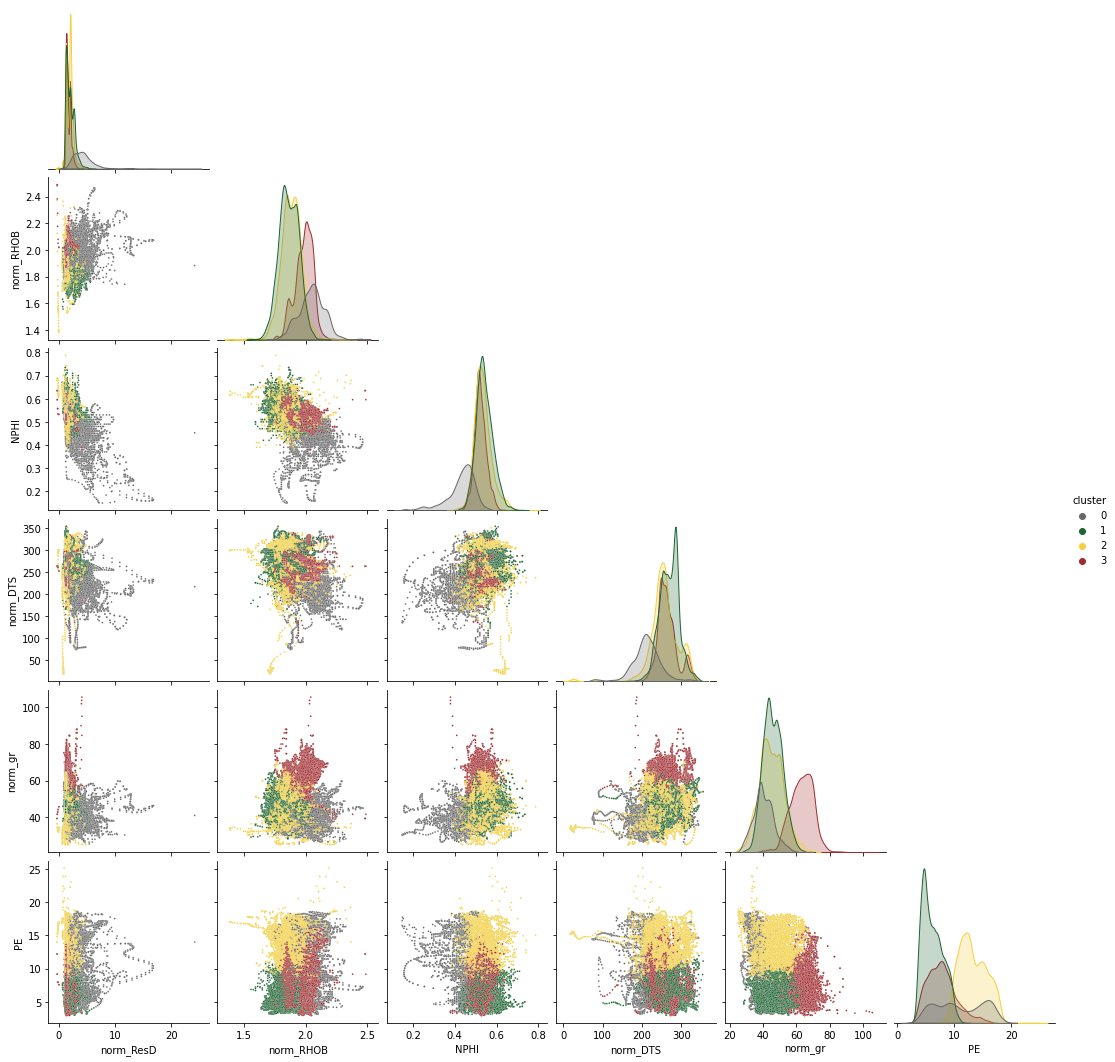

In [ ]:
import seaborn as sns
plt.figure(figsize = (15,15))
data1 = pd.DataFrame(data,columns=feature)
data1['cluster'] = pred1
facies_names = ['Cl', 'Slst','CalCl', 'VolSs']
facies_colors = ['#686868', '#1e6432','#F4D03F','#a12b2f']
sns.pairplot(data1, hue='cluster', corner=True, palette=facies_colors, plot_kws={"s": 3})

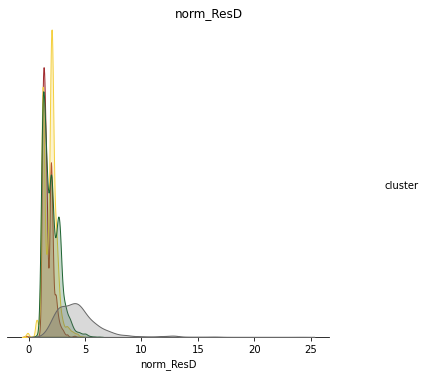

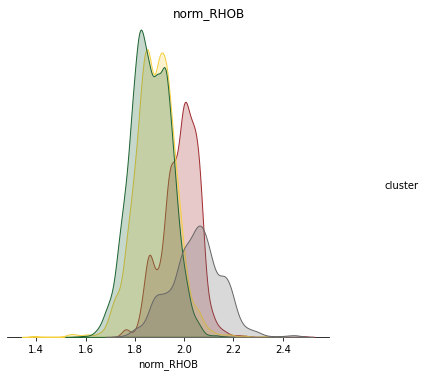

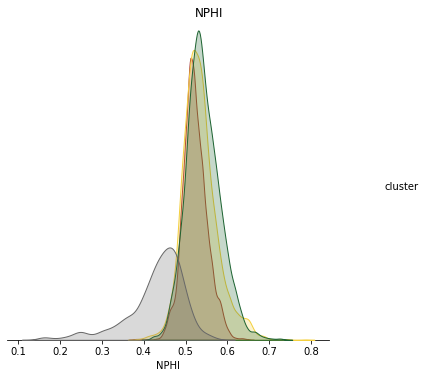

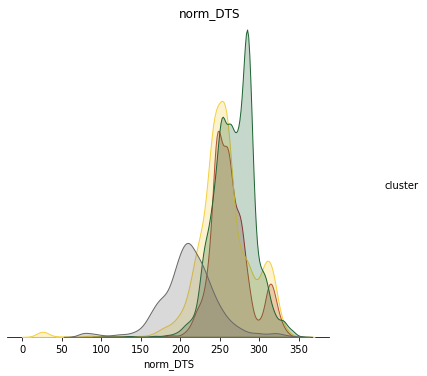

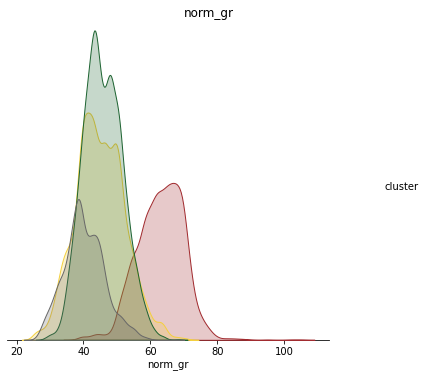

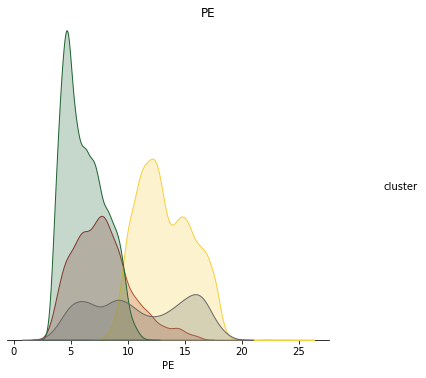

In [ ]:
for i in range(len(feature)):
  colom = [feature[i], 'cluster']
  datadist = data1[colom]

  g = sns.pairplot(datadist, hue='cluster', corner=True, palette=facies_colors,plot_kws={"s": 3})
  g.fig.set_size_inches(6,6)
  g.fig.suptitle(feature[i])

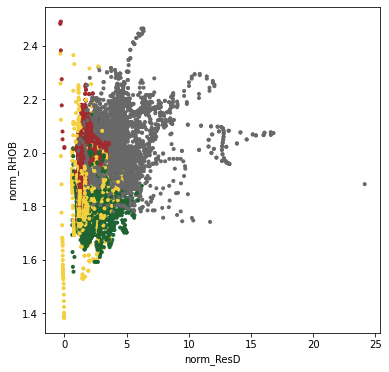

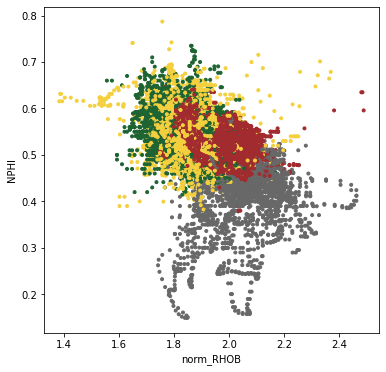

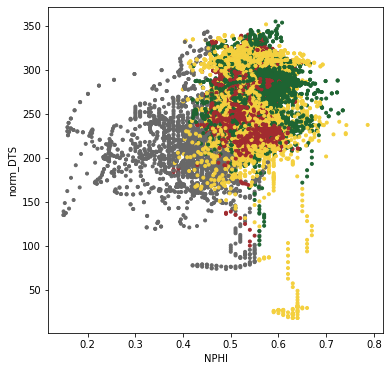

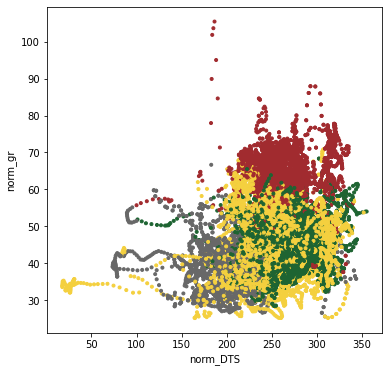

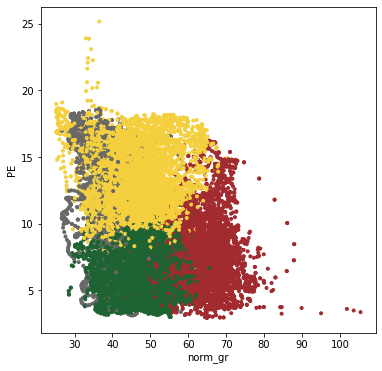

In [ ]:
from matplotlib import colors
mycmap = colors.ListedColormap(facies_colors)
for i in range(len(feature)-1):
  plt.figure(figsize = (6,6))
  x = train[feature[i]].values
  y = train[feature[i+1]].values
  plt.scatter(x,y,c = train['KMeans'],marker = '.', cmap = mycmap)
  plt.xlabel(feature[i])
  plt.ylabel(feature[i+1])

Text(0, 0.5, 'Frequency')

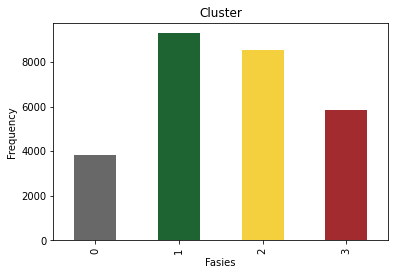

In [ ]:
ax = train['KMeans'].value_counts(sort = False).plot(kind='bar',
                                    title="Cluster", color=facies_colors)
ax.set_xlabel("Fasies")
ax.set_ylabel("Frequency")

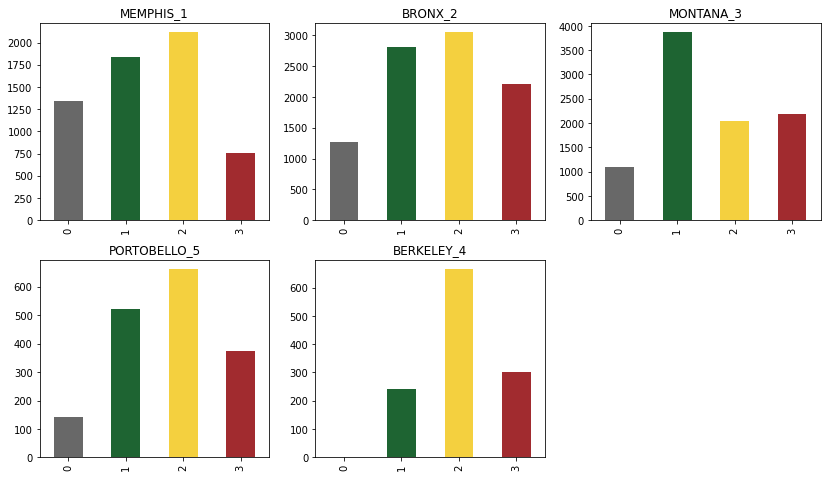

In [ ]:
well = train['WELL'].unique()
for i in range(len(well)):
  plt.subplot(2,3,i+1)
  w = train[train['WELL'] == well[i]]
  w['KMeans'].value_counts(sort = False).plot(kind='bar',figsize=(14,8),
                                    title=well[i], color=facies_colors)

In [ ]:
max_cut = []
min_cut = []

for i in range(4):
  data_ob = train[train["KMeans"] == i]
  dataq = data_ob.quantile([0.05,0.95])
  dataq = dataq.round(2)
  display(dataq)

DEPTH  norm_ResD  norm_RHOB  NPHI  norm_DTS     PE  norm_gr  KMeans
0.05   752.5       2.04       1.87  0.28    158.25   4.67    30.64     0.0
0.95  3102.5       7.77       2.20  0.51    268.23  17.05    51.06     0.0

DEPTH  norm_ResD  norm_RHOB  NPHI  norm_DTS    PE  norm_gr  KMeans
0.05   883.55       1.15       1.73  0.48    228.35  3.76    36.66     1.0
0.95  3118.45       3.37       1.99  0.61    308.20  9.37    55.61     1.0

DEPTH  norm_ResD  norm_RHOB  NPHI  norm_DTS     PE  norm_gr  KMeans
0.05  1023.75       1.14       1.75  0.48    206.23   9.79    33.26     2.0
0.95  3153.39       2.80       2.01  0.61    316.17  17.34    57.25     2.0

DEPTH  norm_ResD  norm_RHOB  NPHI  norm_DTS     PE  norm_gr  KMeans
0.05  1485.5       1.18       1.85  0.48    227.88   4.14    51.69     3.0
0.95  3279.0       2.47       2.08  0.57    315.68  12.55    72.86     3.0

PCA + KMEANS PROCESS

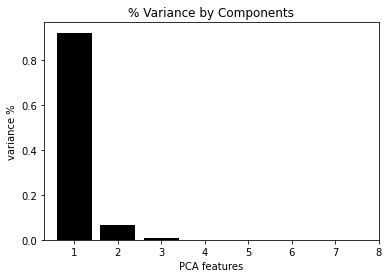

In [ ]:
data = train[feature]
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data)
pca.explained_variance_ratio_
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='black')
plt.title('% Variance by Components')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(range(1,9))
plt.savefig('% Variance by Components IsoFreq 10 Hz.png', dpi=1000)

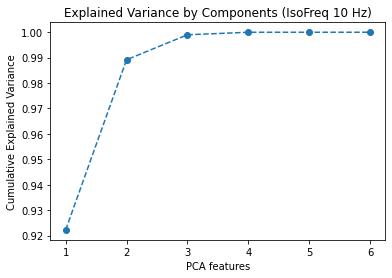

In [ ]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components (IsoFreq 10 Hz)')
plt.xlabel('PCA features')
plt.ylabel('Cumulative Explained Variance')
plt.savefig('Explained Variance by Components IsoFreq 10 Hz.png', dpi=1000)

In [ ]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
principalComponents_2 = pca_2.fit_transform(data)
principalDf = pd.DataFrame(principalComponents_2, columns = ['PC1', 'PC2'])

scaler = StandardScaler().fit(principalComponents_2)
scaled_features = scaler.transform(principalComponents_2)
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(scaled_features)
kmeans.inertia_
pred_pca = kmeans.predict(scaled_features)
train['PCA_KMeans'] = pred_pca

In [ ]:
pca_2.explained_variance_ratio_

array([0.92219779, 0.06697822])

The variance is maximized along PC1 (explains 93% of the variance) and PC2 (explains 5% of the variance). Together, they explain 98%.

In [ ]:
pca_2.explained_variance_

array([1347.83824248,   97.89202702])

The eigenvalues is 1315.8351761 for PC1 and 80.85666313 for PC2

In [ ]:
print(abs(pca_2.components_[0]))

[1.24036863e-02 7.87583176e-04 5.25499719e-04 9.97006755e-01
 7.21669938e-02 2.47932898e-02]


The eigenvectors for PC1 are 1.31778250e-02 1.08918686e-03 5.53229473e-04 9.96584680e-01 7.56446657e-02 3.03597052e-02
We can conclude that features DTS are the most important for PC1.

In [ ]:
print(abs(pca_2.components_[1]))

[2.75725364e-02 2.10739159e-03 5.05464656e-04 7.42862576e-02
 9.93500637e-01 8.16890107e-02]


The eigenvectors for PC2 are 2.40517906e-02 1.41865733e-03 4.59051667e-04 7.85288857e-02 9.92019522e-01 9.56544304e-02
We can conclude that features GR are the most important for PC2

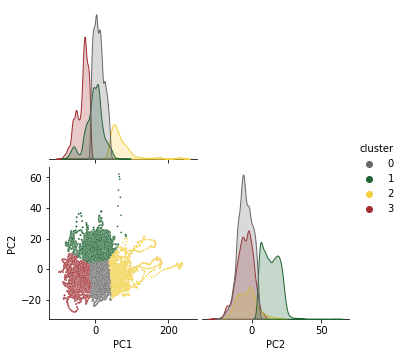

In [ ]:
principalDf['cluster'] = pred_pca
sns.pairplot(principalDf, hue='cluster', corner=True, palette=facies_colors,plot_kws={"s": 3})

<Figure size 1080x1080 with 0 Axes>

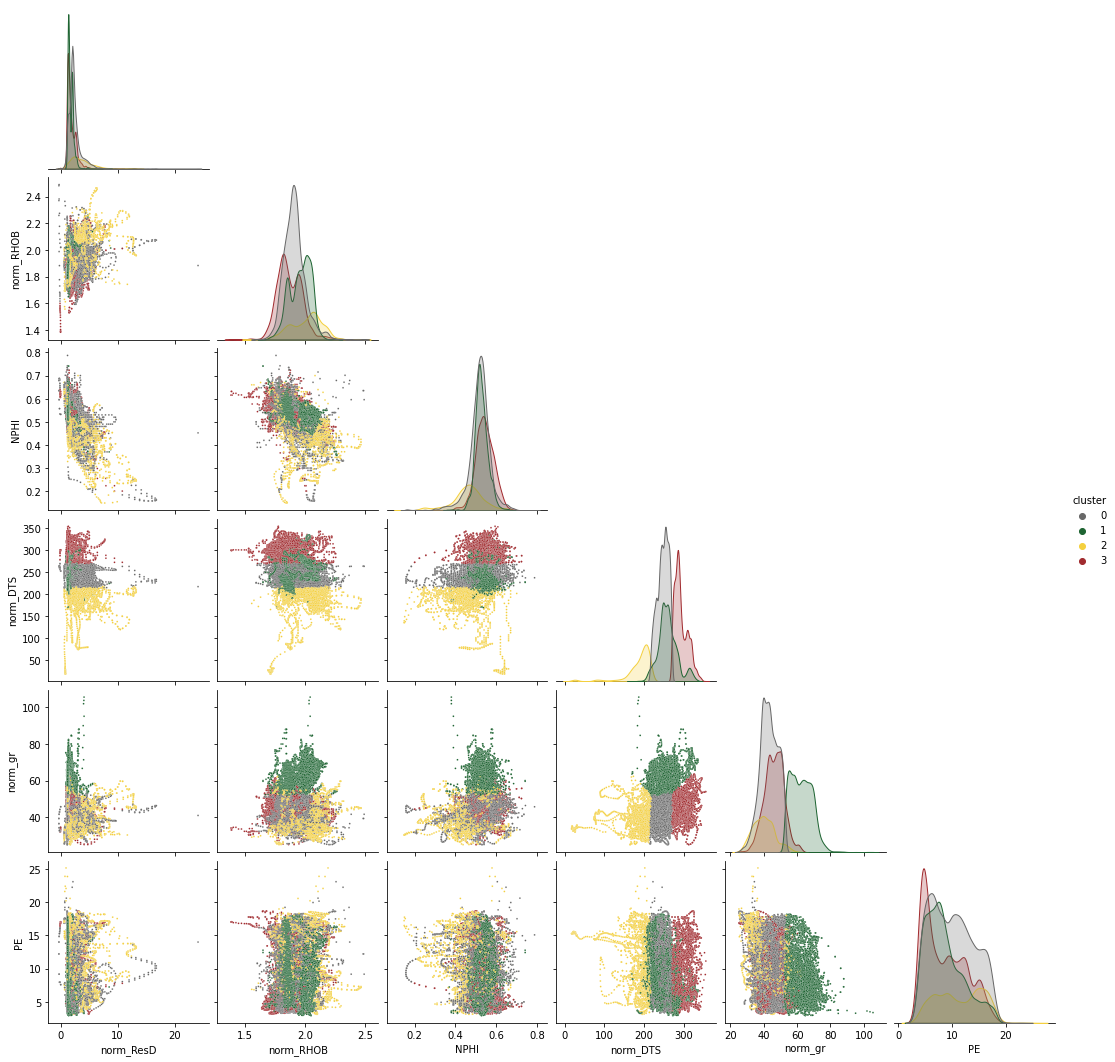

In [ ]:
plt.figure(figsize = (15,15))
data1 = pd.DataFrame(data,columns=feature)
data1['cluster'] = pred_pca
facies_names = ['Cl', 'Slst','CalCl', 'VolSs']
facies_colors = ['#686868', '#1e6432','#F4D03F','#a12b2f']
sns.pairplot(data1, hue='cluster', corner=True, palette=facies_colors,plot_kws={"s": 3})

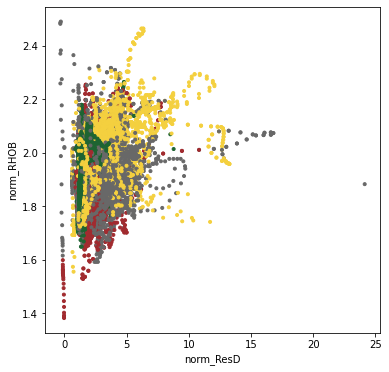

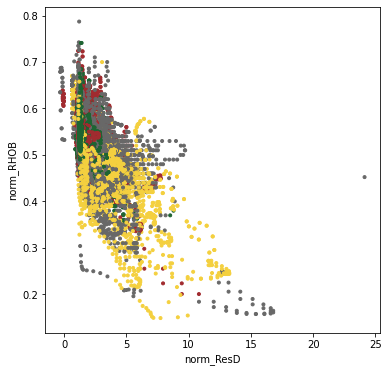

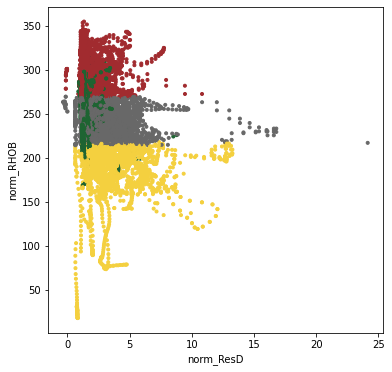

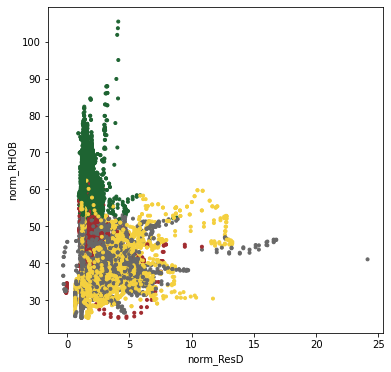

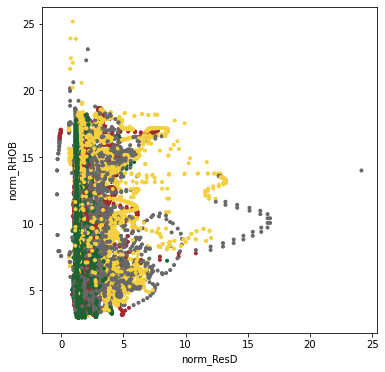

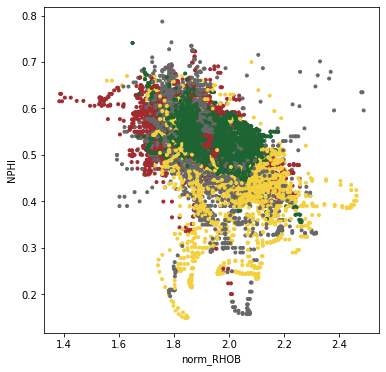

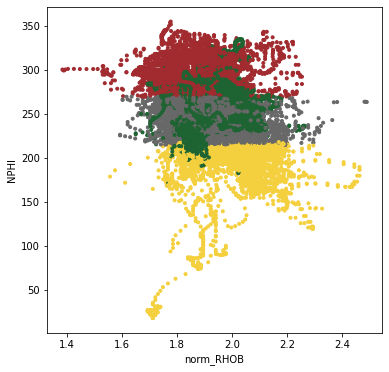

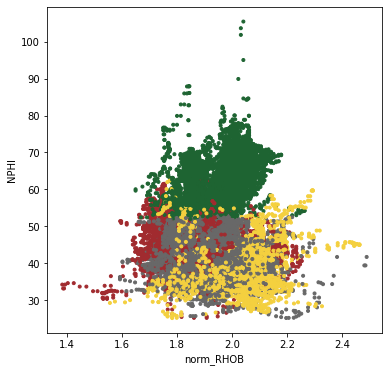

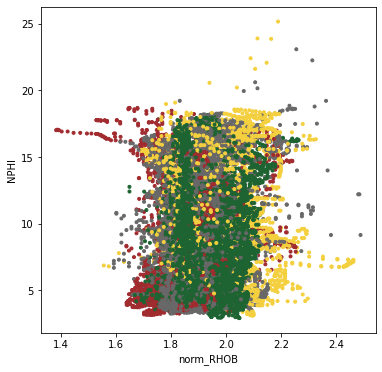

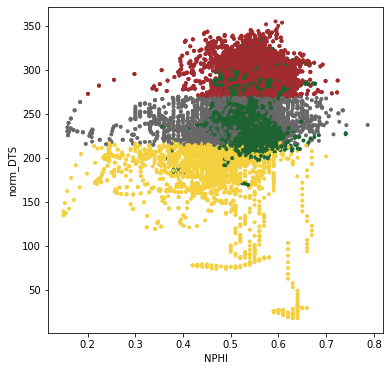

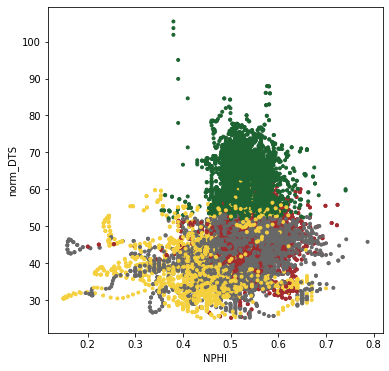

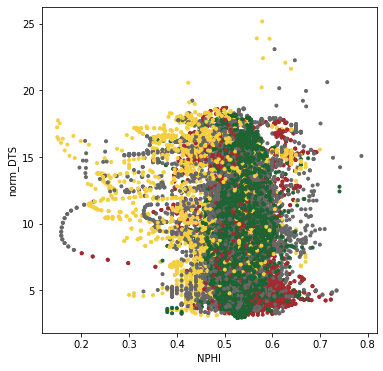

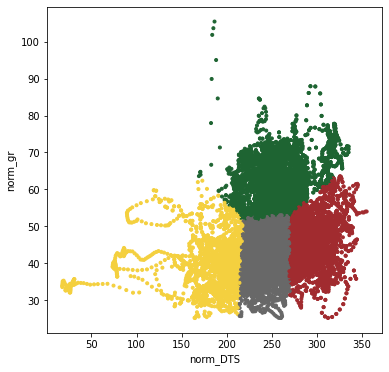

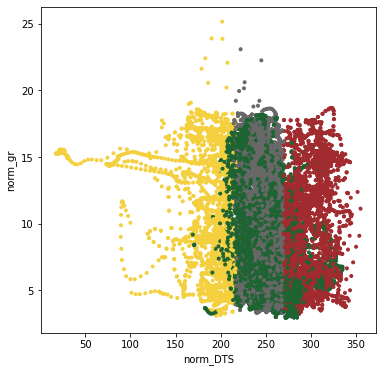

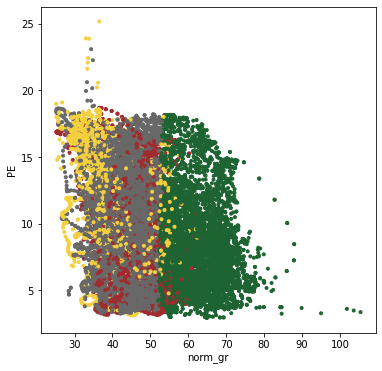

In [ ]:
from matplotlib import colors
train['cluster'] = pred_pca
mycmap = colors.ListedColormap(facies_colors)
for i in range(len(feature)):
  for j in range(i+1,len(feature)):
    plt.figure(figsize = (6,6))
    x = train[feature[i]].values
    y = train[feature[j]].values
    plt.scatter(x,y,c = train['PCA_KMeans'],marker = '.', cmap = mycmap)
    plt.xlabel(feature[i])
    plt.ylabel(feature[i+1])

Text(0, 0.5, 'Frequency')

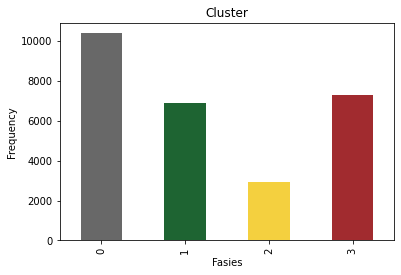

In [ ]:
ax = data1['cluster'].value_counts(sort = False).plot(kind='bar',
                                    title="Cluster", color=facies_colors)
ax.set_xlabel("Fasies")
ax.set_ylabel("Frequency")

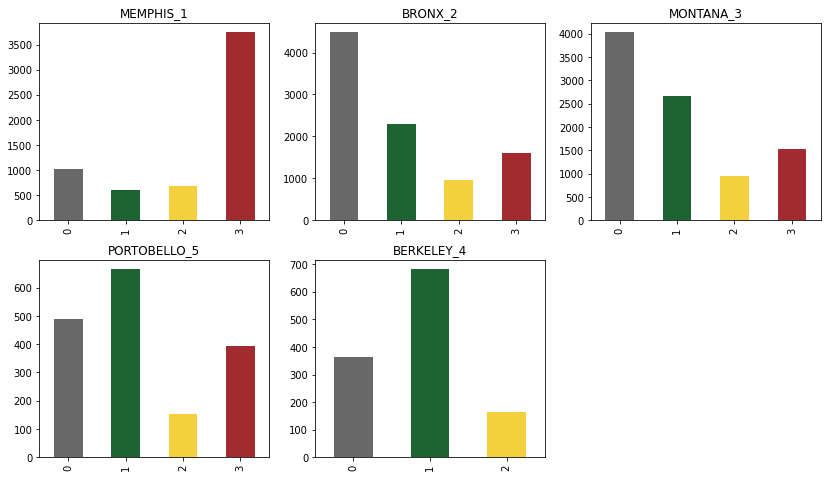

In [ ]:
for i in range(len(well)):
  plt.subplot(2,3,i+1)
  w = train[train['WELL'] == well[i]]
  w['PCA_KMeans'].value_counts(sort = False).plot(kind='bar',figsize=(14,8),
                                    title=well[i], color=facies_colors)

In [ ]:
max_cut = []
min_cut = []

for i in range(4):
  data_ob = data1[data1["cluster"] == i]
  dataq = data_ob.quantile([0.05,0.95])
  dataq = dataq.round(2)
  display(dataq)

norm_ResD  norm_RHOB  NPHI  norm_DTS  norm_gr     PE  cluster
0.05       1.19       1.78  0.43    221.41    33.97   4.26      0.0
0.95       4.71       2.07  0.59    266.36    51.44  16.74      0.0

norm_ResD  norm_RHOB  NPHI  norm_DTS  norm_gr     PE  cluster
0.05       1.19       1.81  0.48    220.22    53.51   4.14      1.0
0.95       2.59       2.08  0.58    311.31    72.41  15.80      1.0

norm_ResD  norm_RHOB  NPHI  norm_DTS  norm_gr     PE  cluster
0.05       1.23       1.78  0.29    101.18    29.97   4.69      2.0
0.95       7.57       2.20  0.59    213.93    52.46  17.18      2.0

norm_ResD  norm_RHOB  NPHI  norm_DTS  norm_gr     PE  cluster
0.05       1.13       1.72  0.47    271.68    36.35   3.88      3.0
0.95       3.38       2.04  0.62    322.61    55.18  15.44      3.0

In [ ]:
target = pd.read_csv('data_nan.csv')
target['WELL'] = target["WELL"].replace("MONTANA", "MONTANA_3")
target['WELL'] = target["WELL"].replace("BRONX", "BRONX_2")
target['WELL'] = target["WELL"].replace("BERKELEY", "BERKELEY_4")
target['WELL'] = target["WELL"].replace("MEMPHIS", "MEMPHIS_1")
target['WELL'] = target["WELL"].replace("PORTOBELLO", "PORTOBELLO_5")

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib


def display_cm(cm, labels, hide_zeros=False,
                             display_metrics=False):
    """Display confusion matrix with labels, along with
       metrics such as Recall, Precision and F1 score.
       Based on Zach Guo's print_cm gist at
       https://gist.github.com/zachguo/10296432
    """

    precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)
    
    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0
    
    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    #print total_precision
    
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + " Pred", end=' ')
    for label in labels: 
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')
    print("    " + " True")
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)): 
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i,:]))
        
    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_F1)
    
                  
def display_adj_cm(
        cm, labels, adjacent_facies, hide_zeros=False, 
        display_metrics=False):
    """This function displays a confusion matrix that counts 
       adjacent facies as correct.
    """
    adj_cm = np.copy(cm)
    
    for i in np.arange(0,cm.shape[0]):
        for j in adjacent_facies[i]:
            adj_cm[i][i] += adj_cm[i][j]
            adj_cm[i][j] = 0.0
        
    display_cm(adj_cm, labels, hide_zeros, 
                             display_metrics)
        

def make_facies_log_plot(logs, facies_colors,target):
    #make sure logs are sorted by depth

    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    
    target = target[target['DEPTH'] <= zbot]
    target = target[target['DEPTH'] >= ztop]

    nanval = target['nan'].values
    log = logs['KMeans'].values
    fasies = []
    a = 0
    for i in range(len(nanval)):
        if nanval[i] == False:
          fasies.append(log[a])
          a = a+1
        else:
          fasies.append(log[a])
    # print(fasies)
    cluster=np.repeat(np.expand_dims(fasies,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(10, 12))
    plt.subplots_adjust(left=0.1, 
                    right=0.9,  
                    wspace=0.4)
    ax[0].plot(logs.norm_gr, logs.DEPTH, '-g')
    ax[1].plot(np.log10(logs.norm_ResD), logs.DEPTH, '-')
    ax[2].plot(logs.norm_RHOB, logs.DEPTH, '-', color='grey')
    ax3 = ax[2].twiny()
    ax3.plot(logs.NPHI, logs.DEPTH, '-', color='r')
    ax[4].plot(logs.PE, logs.DEPTH, '-', color='black')
    ax[3].plot(logs.norm_DTS, logs.DEPTH, '-', color='m')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin = 0, vmax = 3)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR_NORM")
    ax[0].set_xlim(0,100)
    ax[0].tick_params(axis='x', colors="green")
    ax[0].spines["top"].set_edgecolor("green")
    ax[0].title.set_color('green')
    ax[0].grid(which='major', color='lightgrey', linestyle='-')
    ax[0].xaxis.set_ticks_position("top")
    ax[0].xaxis.set_label_position("top")
    ax[0].spines["top"].set_position(("axes", 1.02))
    
    ax[1].set_xlabel("ResD")
    ax[1].set_xscale('log')
    ax[1].set_xlim(0.2,200)
    ax[1].set_xticks([0.2, 10, 200])
    ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax[1].tick_params(axis='x', colors="b")
    ax[1].spines["top"].set_edgecolor("b")
    ax[1].title.set_color('b')
    ax[1].grid(which='major', color='lightgrey', linestyle='-')
    ax[1].xaxis.set_ticks_position("top")
    ax[1].xaxis.set_label_position("top")
    ax[1].spines["top"].set_position(("axes", 1.02))
    

    ax[2].set_xlabel("RHOB")
    ax[2].set_xlim(1.7,2.7)
    ax[2].tick_params(axis='x', colors="grey")
    ax[2].spines["top"].set_edgecolor("grey")
    ax[2].title.set_color('r')
    ax[2].grid(which='major', color='lightgrey', linestyle='-')
    ax[2].xaxis.set_ticks_position("top")
    ax[2].xaxis.set_label_position("top")
    ax[2].spines["top"].set_position(("axes", 1.02))
    
    ax3.set_xlabel("NPHI")
    ax3.set_xlim(0.6,0)
    ax3.tick_params(axis='x', colors="r")
    ax3.spines["top"].set_edgecolor("r")
    ax3.title.set_color('green')
    ax3.grid(which='major', color='lightgrey', linestyle='-')
    ax3.xaxis.set_ticks_position("top")
    ax3.xaxis.set_label_position("top")
    ax3.spines["top"].set_position(("axes", 1.08))
    
    ax[3].set_xlabel("DTS")
    ax[3].set_xlim(40,240)
    ax[3].tick_params(axis='x', colors="m")
    ax[3].spines["top"].set_edgecolor("m")
    ax[3].title.set_color('m')
    ax[3].grid(which='major', color='lightgrey', linestyle='-')
    ax[3].xaxis.set_ticks_position("top")
    ax[3].xaxis.set_label_position("top")
    ax[3].spines["top"].set_position(("axes", 1.02))
    
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(0,20)
    ax[4].tick_params(axis='x', colors="black")
    ax[4].spines["top"].set_edgecolor("black")
    ax[4].title.set_color('black')
    ax[4].grid(which='major', color='lightgrey', linestyle='-')
    ax[4].xaxis.set_ticks_position("top")
    ax[4].xaxis.set_label_position("top")
    ax[4].spines["top"].set_position(("axes", 1.02))
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);
    ax[5].set_yticklabels([]);
    # ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


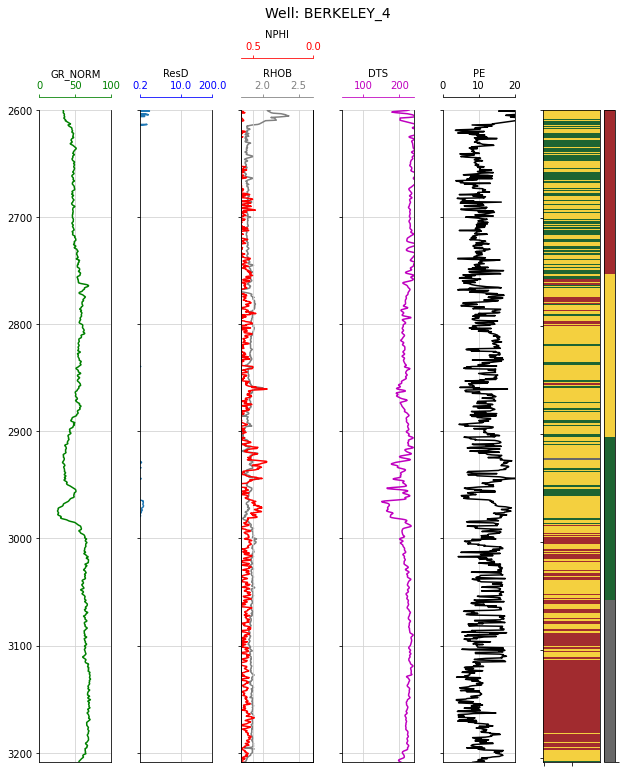

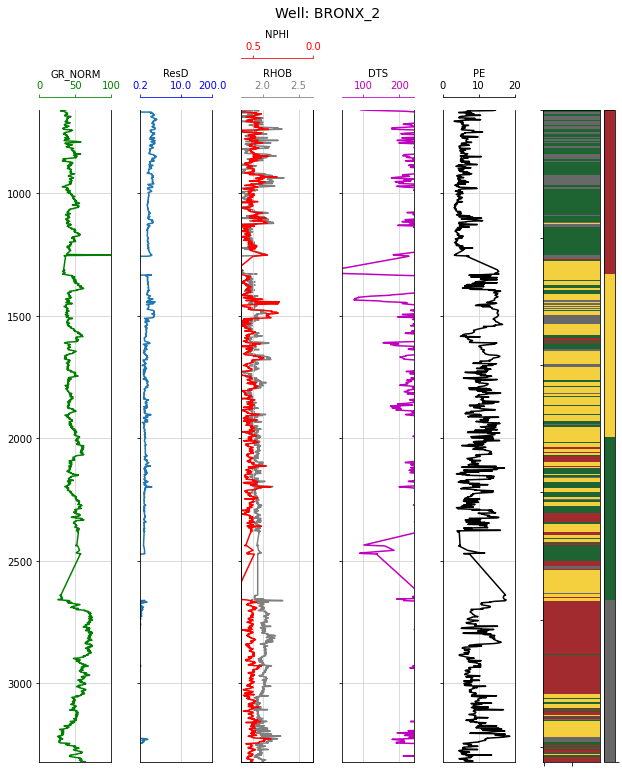

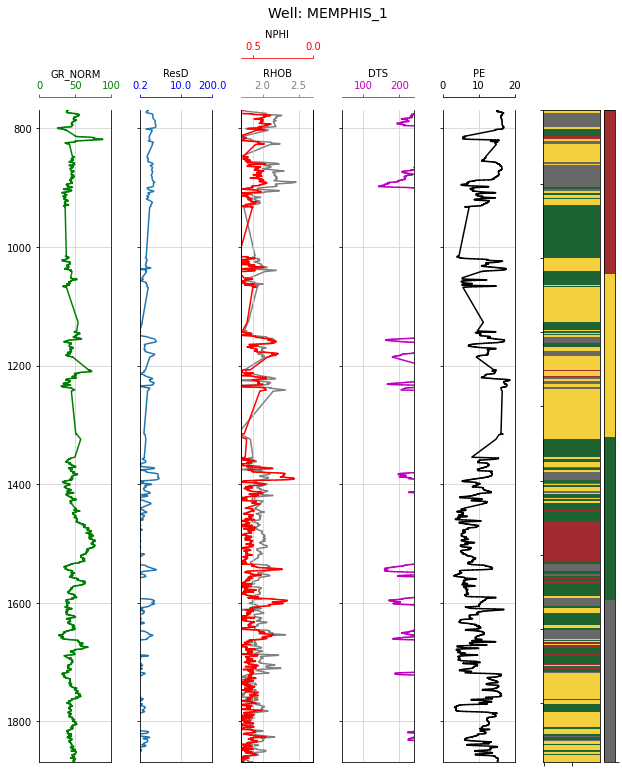

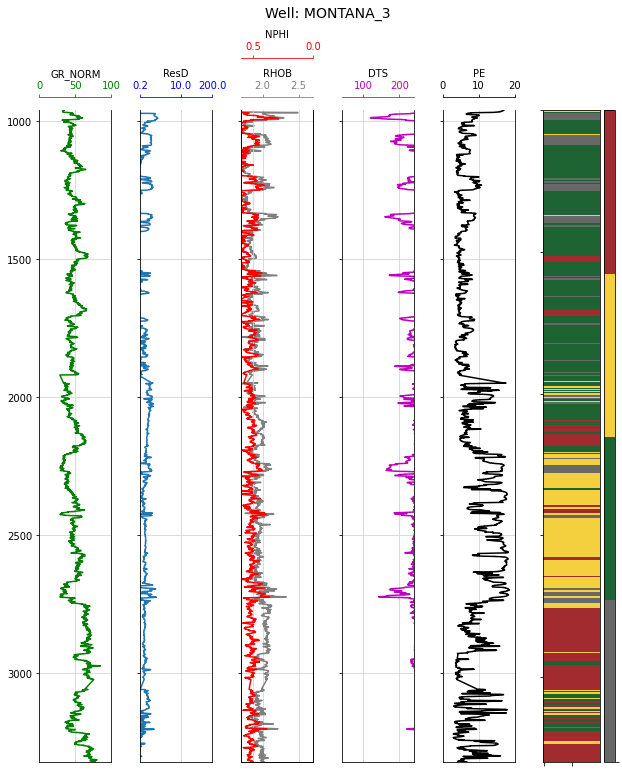

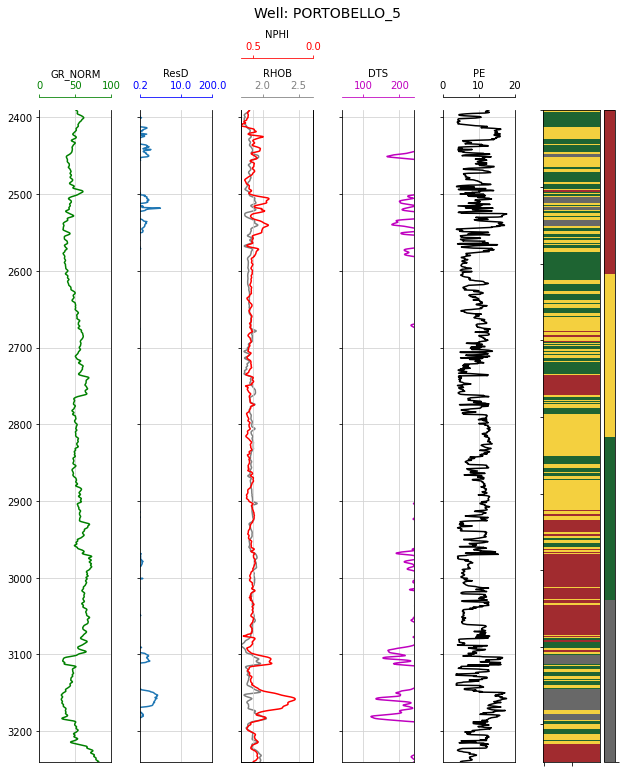

In [ ]:
for i in np.unique(train['WELL']):
  make_facies_log_plot(
      train[train['WELL']==i],
      facies_colors=facies_colors, target = target[target['WELL']==i])

In [ ]:
def make_facies_log_plot(logs, facies_colors,target):
    #make sure logs are sorted by depth

    logs = logs.sort_values(by='DEPTH')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH.min(); zbot=logs.DEPTH.max()
    
    target = target[target['DEPTH'] <= zbot]
    target = target[target['DEPTH'] >= ztop]

    nanval = target['nan'].values
    log = logs['PCA_KMeans'].values
    fasies = []
    a = 0
    for i in range(len(nanval)):
        if nanval[i] == False:
          fasies.append(log[a])
          a = a+1
        else:
          fasies.append(log[a])
    # print(fasies)
    cluster=np.repeat(np.expand_dims(fasies,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(10, 12))
    plt.subplots_adjust(left=0.1, 
                    right=0.9,  
                    wspace=0.4)
    ax[0].plot(logs.norm_gr, logs.DEPTH, '-g')
    ax[1].plot(np.log10(logs.norm_ResD), logs.DEPTH, '-')
    ax[2].plot(logs.norm_RHOB, logs.DEPTH, '-', color='grey')
    ax3 = ax[2].twiny()
    ax3.plot(logs.NPHI, logs.DEPTH, '-', color='r')
    ax[4].plot(logs.PE, logs.DEPTH, '-', color='black')
    ax[3].plot(logs.norm_DTS, logs.DEPTH, '-', color='m')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin = 0, vmax = 3)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR_NORM")
    ax[0].set_xlim(0,100)
    ax[0].tick_params(axis='x', colors="green")
    ax[0].spines["top"].set_edgecolor("green")
    ax[0].title.set_color('green')
    ax[0].grid(which='major', color='lightgrey', linestyle='-')
    ax[0].xaxis.set_ticks_position("top")
    ax[0].xaxis.set_label_position("top")
    ax[0].spines["top"].set_position(("axes", 1.02))
    
    ax[1].set_xlabel("ResD")
    ax[1].set_xscale('log')
    ax[1].set_xlim(0.2,200)
    ax[1].set_xticks([0.2, 10, 200])
    ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax[1].tick_params(axis='x', colors="b")
    ax[1].spines["top"].set_edgecolor("b")
    ax[1].title.set_color('b')
    ax[1].grid(which='major', color='lightgrey', linestyle='-')
    ax[1].xaxis.set_ticks_position("top")
    ax[1].xaxis.set_label_position("top")
    ax[1].spines["top"].set_position(("axes", 1.02))
    

    ax[2].set_xlabel("RHOB")
    ax[2].set_xlim(1.7,2.7)
    ax[2].tick_params(axis='x', colors="grey")
    ax[2].spines["top"].set_edgecolor("grey")
    ax[2].title.set_color('r')
    ax[2].grid(which='major', color='lightgrey', linestyle='-')
    ax[2].xaxis.set_ticks_position("top")
    ax[2].xaxis.set_label_position("top")
    ax[2].spines["top"].set_position(("axes", 1.02))
    
    ax3.set_xlabel("NPHI")
    ax3.set_xlim(0.6,0)
    ax3.tick_params(axis='x', colors="r")
    ax3.spines["top"].set_edgecolor("r")
    ax3.title.set_color('green')
    ax3.grid(which='major', color='lightgrey', linestyle='-')
    ax3.xaxis.set_ticks_position("top")
    ax3.xaxis.set_label_position("top")
    ax3.spines["top"].set_position(("axes", 1.08))
    
    ax[3].set_xlabel("DTS")
    ax[3].set_xlim(40,240)
    ax[3].tick_params(axis='x', colors="m")
    ax[3].spines["top"].set_edgecolor("m")
    ax[3].title.set_color('m')
    ax[3].grid(which='major', color='lightgrey', linestyle='-')
    ax[3].xaxis.set_ticks_position("top")
    ax[3].xaxis.set_label_position("top")
    ax[3].spines["top"].set_position(("axes", 1.02))
    
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(0,20)
    ax[4].tick_params(axis='x', colors="black")
    ax[4].spines["top"].set_edgecolor("black")
    ax[4].title.set_color('black')
    ax[4].grid(which='major', color='lightgrey', linestyle='-')
    ax[4].xaxis.set_ticks_position("top")
    ax[4].xaxis.set_label_position("top")
    ax[4].spines["top"].set_position(("axes", 1.02))
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]);
    ax[5].set_yticklabels([]);
    # ax[6].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


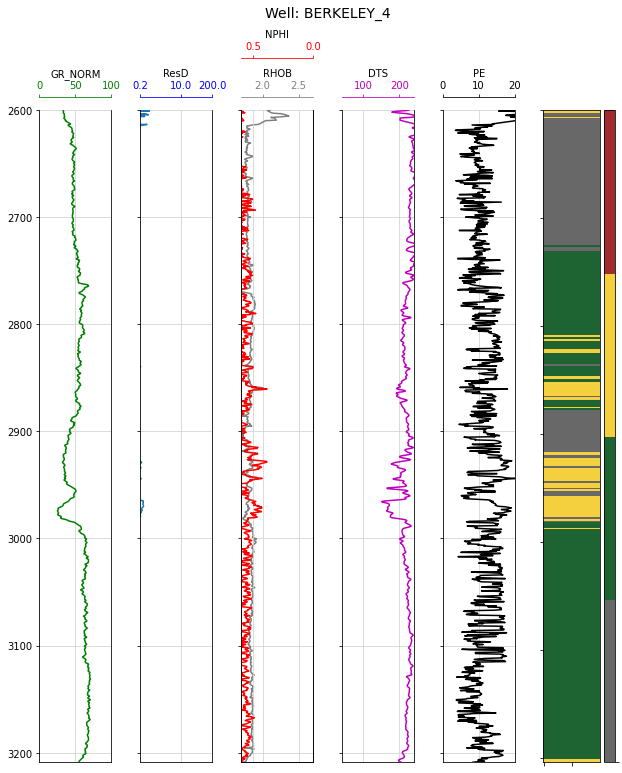

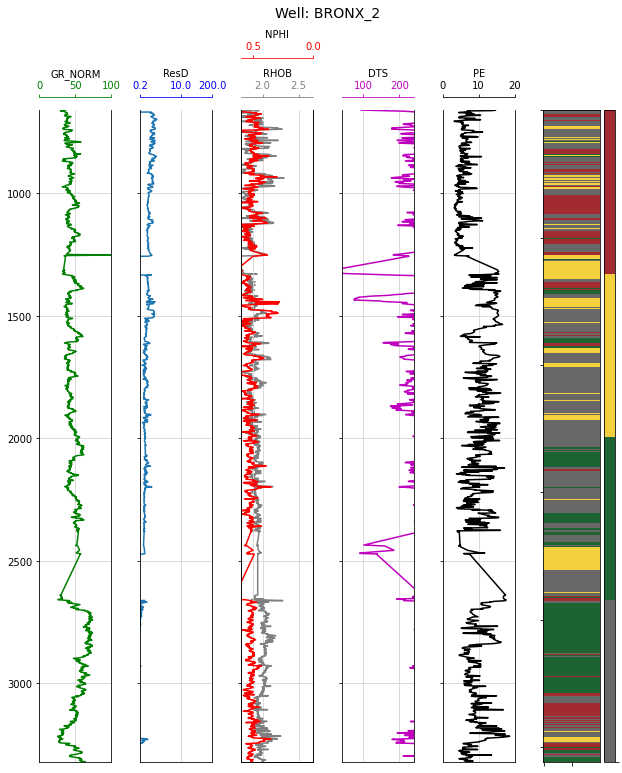

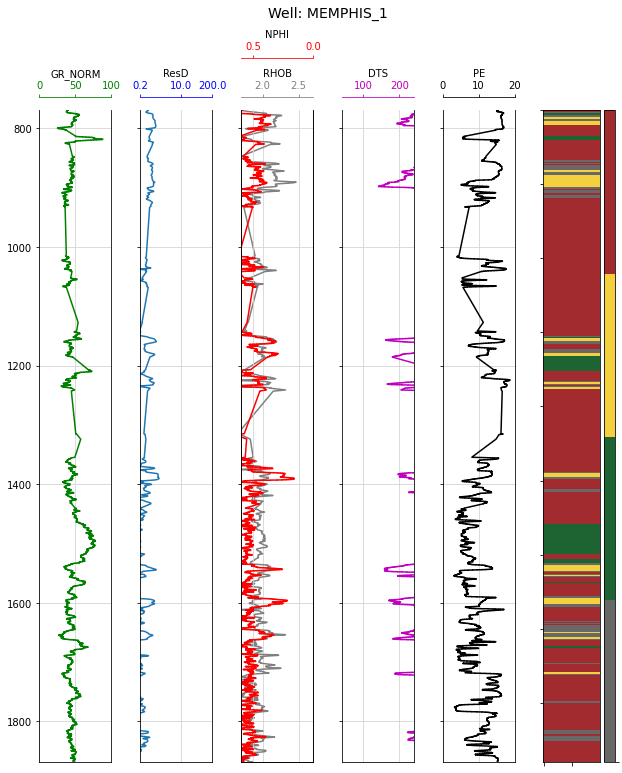

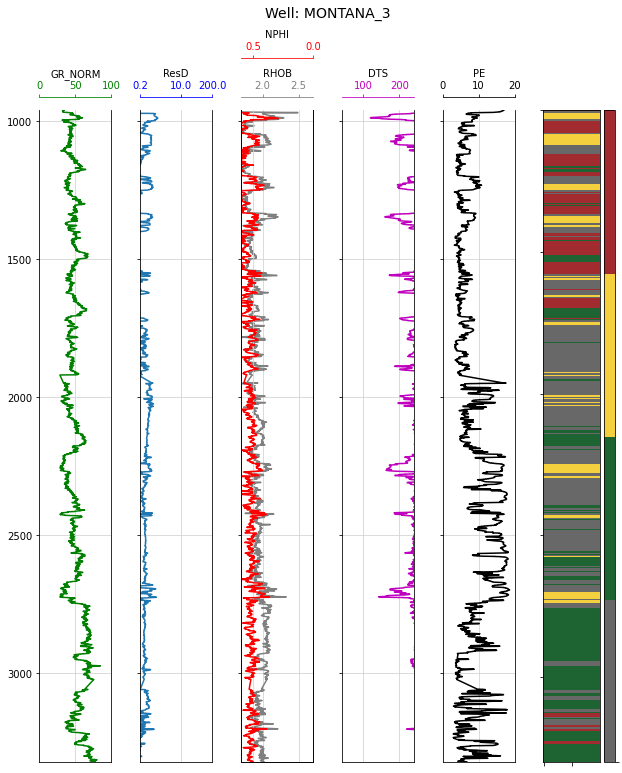

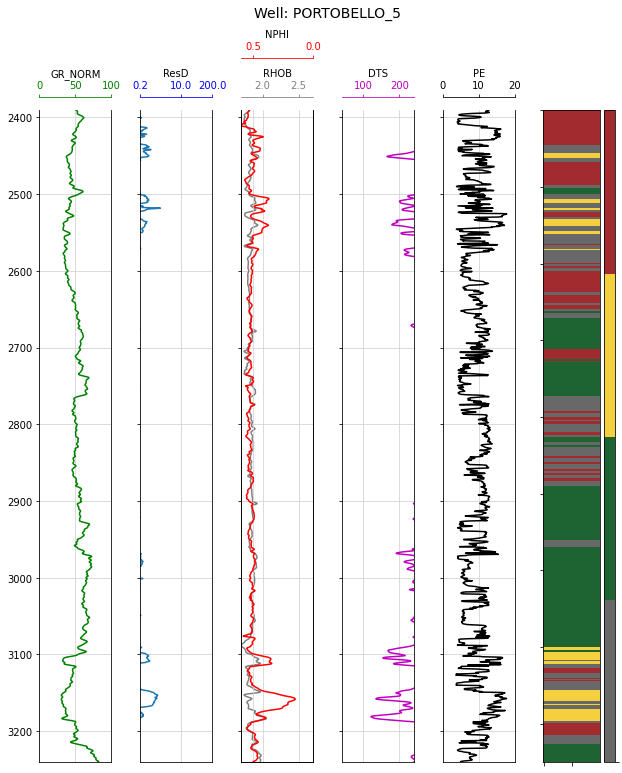

In [ ]:
for i in np.unique(train['WELL']):
  make_facies_log_plot(
      train[train['WELL']==i],
      facies_colors=facies_colors, target = target[target['WELL']==i])